# <font color='Blue'>Introduction à PySpark</font>

Ce notebook a pour objectif de vous familiariser avec les fonctions et commandes de base de Spark en utilisant l'API Python (PySpark)

## Installation 

Vous devez installer les dépendences dans l'environnement de votre Google Colab. Vous aurez besoin de :

 * openjdk-8-jdk-headless
 * spark 3.0.3 avec hadoop 2.7 
 * PySpark 3.0.3
 * findspark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz && tar xf spark-3.0.3-bin-hadoop2.7.tgz
!pip install pyspark==3.0.3 findspark

--2021-10-07 11:56:59--  https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz’

spark-3.0.3-bin-had 100%[===================>] 210.19M   213MB/s    in 1.0s    

2021-10-07 11:57:00 (213 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz’ saved [220400553/220400553]

     |████████████████████████████████| 209.1 MB 61 kB/s 
     |████████████████████████████████| 198 kB 72.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.3-py2.py3-none-any.whl size=209435970 sha256=af9b8c42f571e1c3dce459c63eba1bb78ccb5d3b9c39d42344aba422ffa26636
  Stored in directory: /root/.cache/pip/wheels/7e/6d/0a/6b0bf301bc056d9af03194b732b9f49ad2fceb205aab2984fd
Successfully built pyspark


## Configurer et créer une session Spark

Depuis la version 2.0 de Spark le point d'entrée à PySpark est **SparkSession**, antérieurement le point d'entrée était **SparkContext**.

Une session `SparkSession` crée des objets `SparkConfig` et `SparkContext` en interne. Une session `SparkSession` peut être créée en utilisant `SparkSession.builder`



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
                    .appName("Introduction to pyspark")\
                    .master("local[*]")\
                    .getOrCreate()

La commande précédente crée un session Spark en utilisant le "builder" 

* `appName()` cette méthode est utilisée pour configurer le nom de votre application
* `master()`
  * Si Spark est executé dans un cluster vous devez donner le nom du master en argument, typiquement `yarn` ou `mesos`. 
  * Si Spark est configuré en mode `standalone` utilisez l'agument `local[X]`. `X` étant le nombre de partitions que doit créer votre Spark. `X` doit être une valeur supérieure à 0 et de manière générale sa valeur doit être égale au nombre de processeurs. Dans notre exemple ci-dessus `*` représente tous les processeurs disponibles. 
* `getOrCreate()` cette méthode retourne une session Spark si elle existe ou autrement en crée une nouvelle.


## Télécharger et lire un fichier

Uploader les fichiers fournis avec ce notebook dans l'environement Colab. Utilisez `google.colab files`

Pour rappel les fichiers sont :

* `WorldCupMatches.scv`
* `WorldCupPlayers.csv`
* `WorldCups.csv`

In [ ]:
from google.colab import files

uploaded = files.upload()



root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)



Listez les fichiers

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)



Utilisez la méthode `spark.read.csv` pour lire le fichier `WorldCupMatches.csv`

In [ ]:
Wc_matches = spark.read.csv('./WorldCupMatches.csv')


## Inspecter un DataFrame

### Afficher le schema d'un DataFrame

Utilisez la méthode `printSchema` pour afficher le schèma de votre DataFrame.

Que remarquez-vous ? 

In [ ]:
Wc_matches.printSchema()

<font color='Blue'>Tip: PrintSchema bien qu'affichant des données reste une opération d'input/output et non une action ce qui fait qu'elle est rapide en execution</font>


### Ajouter les labels depuis le CSV

* Chercher l'option qui permet d'ajouter les labels.
* Afficher le schèma de nouveau et observez la différence

In [ ]:
Wc_matches = spark.read.csv('./WorldCupMatches.csv',header = True, inferSchema=True)


### Typer le schèma implicitement ou explicitement 

#### Implicite

* Cherchez l'option dans `read.csv` qui permet de définir les types des colonnes. 
* Afficher le schèma de nouveau et observez la différence

In [ ]:
Wc_matches.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Datetime: string (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Stadium: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Home Team Name: string (nullable = true)
 |-- Home Team Goals: integer (nullable = true)
 |-- Away Team Goals: integer (nullable = true)
 |-- Away Team Name: string (nullable = true)
 |-- Win conditions: string (nullable = true)
 |-- Attendance: integer (nullable = true)
 |-- Half-time Home Goals: integer (nullable = true)
 |-- Half-time Away Goals: integer (nullable = true)
 |-- Referee: string (nullable = true)
 |-- Assistant 1: string (nullable = true)
 |-- Assistant 2: string (nullable = true)
 |-- RoundID: integer (nullable = true)
 |-- MatchID: integer (nullable = true)
 |-- Home Team Initials: string (nullable = true)
 |-- Away Team Initials: string (nullable = true)



#### Définir les types explicitement.

Executez le code suivant et comparez le type de la colonne `DateTime` entre la version explicite et la version implicite.

In [ ]:
from pyspark.sql.types import *

data_schema = [
              StructField('Year', IntegerType (),True),
              StructField('Datetime', DateType (),True),
              StructField('Stage', StringType (),True),
              StructField('Stadium', StringType (),True),
              StructField('City', StringType (),True),
              StructField('Home Team Name', StringType (),True),
              StructField('Home Team Goals', IntegerType (),True),
              StructField('Away Team Goals', IntegerType (),True),
              StructField('Away Team Name', StringType (),True),
              StructField('Win conditions', StringType (),True),
              StructField('Attendance', IntegerType (),True),
              StructField('Half-time Home Goals', IntegerType (),True),
              StructField('Half-time Away Goals', IntegerType (),True),
              StructField('Referee', StringType (),True),
              StructField('Assistant 1', StringType (),True),
              StructField('Assistant 2', StringType (),True),
              StructField('RoundID', IntegerType (),True),
              StructField('MatchID', IntegerType (),True),
              StructField('Home Team Initials', StringType (),True),
              StructField('Away Team Initials', StringType (),True),
            ]

final_struc = StructType(fields = data_schema)

worldCupDf = spark.read.csv('WorldCupMatches.csv',
    sep = ',',
    header = True,
    schema = final_struc 
    )

worldCupDf.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Datetime: date (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Stadium: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Home Team Name: string (nullable = true)
 |-- Home Team Goals: integer (nullable = true)
 |-- Away Team Goals: integer (nullable = true)
 |-- Away Team Name: string (nullable = true)
 |-- Win conditions: string (nullable = true)
 |-- Attendance: integer (nullable = true)
 |-- Half-time Home Goals: integer (nullable = true)
 |-- Half-time Away Goals: integer (nullable = true)
 |-- Referee: string (nullable = true)
 |-- Assistant 1: string (nullable = true)
 |-- Assistant 2: string (nullable = true)
 |-- RoundID: integer (nullable = true)
 |-- MatchID: integer (nullable = true)
 |-- Home Team Initials: string (nullable = true)
 |-- Away Team Initials: string (nullable = true)



### Autre méthode pour afficher le shema

Executer la méthode `schema` sur votre dataFrame

In [ ]:
Wc_matches.schema

StructType(List(StructField(Year,IntegerType,true),StructField(Datetime,StringType,true),StructField(Stage,StringType,true),StructField(Stadium,StringType,true),StructField(City,StringType,true),StructField(Home Team Name,StringType,true),StructField(Home Team Goals,IntegerType,true),StructField(Away Team Goals,IntegerType,true),StructField(Away Team Name,StringType,true),StructField(Win conditions,StringType,true),StructField(Attendance,IntegerType,true),StructField(Half-time Home Goals,IntegerType,true),StructField(Half-time Away Goals,IntegerType,true),StructField(Referee,StringType,true),StructField(Assistant 1,StringType,true),StructField(Assistant 2,StringType,true),StructField(RoundID,IntegerType,true),StructField(MatchID,IntegerType,true),StructField(Home Team Initials,StringType,true),StructField(Away Team Initials,StringType,true)))

Utilisez `dtypes` pour lister les types de chaque colone

In [ ]:
Wc_matches.dtypes

[('Year', 'int'),
 ('Datetime', 'string'),
 ('Stage', 'string'),
 ('Stadium', 'string'),
 ('City', 'string'),
 ('Home Team Name', 'string'),
 ('Home Team Goals', 'int'),
 ('Away Team Goals', 'int'),
 ('Away Team Name', 'string'),
 ('Win conditions', 'string'),
 ('Attendance', 'int'),
 ('Half-time Home Goals', 'int'),
 ('Half-time Away Goals', 'int'),
 ('Referee', 'string'),
 ('Assistant 1', 'string'),
 ('Assistant 2', 'string'),
 ('RoundID', 'int'),
 ('MatchID', 'int'),
 ('Home Team Initials', 'string'),
 ('Away Team Initials', 'string')]

Utilisez `head(n)` pour afficher les `n` premieres lignes de votre dataframe. Par défaut si `n` n'est pas spécifié `n= 1` 

In [ ]:
Wc_matches.head(5)

[Row(Year=1930, Datetime='13 Jul 1930 - 15:00 ', Stage='Group 1', Stadium='Pocitos', City='Montevideo ', Home Team Name='France', Home Team Goals=4, Away Team Goals=1, Away Team Name='Mexico', Win conditions=' ', Attendance=4444, Half-time Home Goals=3, Half-time Away Goals=0, Referee='LOMBARDI Domingo (URU)', Assistant 1='CRISTOPHE Henry (BEL)', Assistant 2='REGO Gilberto (BRA)', RoundID=201, MatchID=1096, Home Team Initials='FRA', Away Team Initials='MEX'),
 Row(Year=1930, Datetime='13 Jul 1930 - 15:00 ', Stage='Group 4', Stadium='Parque Central', City='Montevideo ', Home Team Name='USA', Home Team Goals=3, Away Team Goals=0, Away Team Name='Belgium', Win conditions=' ', Attendance=18346, Half-time Home Goals=2, Half-time Away Goals=0, Referee='MACIAS Jose (ARG)', Assistant 1='MATEUCCI Francisco (URU)', Assistant 2='WARNKEN Alberto (CHI)', RoundID=201, MatchID=1090, Home Team Initials='USA', Away Team Initials='BEL'),
 Row(Year=1930, Datetime='14 Jul 1930 - 12:45 ', Stage='Group 2', 

Utilisez `show()` ou `show(n)` pour afficher les n premieres lignes de votre dataframe


In [ ]:

print(Wc_matches.Year)

Column<b'Year'>


Utilisez `describe()` pour décrire votre dataFrame et obtenir une résumé des stats 

In [ ]:
Wc_matches.describe()

DataFrame[summary: string, Year: string, Datetime: string, Stage: string, Stadium: string, City: string, Home Team Name: string, Home Team Goals: string, Away Team Goals: string, Away Team Name: string, Win conditions: string, Attendance: string, Half-time Home Goals: string, Half-time Away Goals: string, Referee: string, Assistant 1: string, Assistant 2: string, RoundID: string, MatchID: string, Home Team Initials: string, Away Team Initials: string]

Utilisez `columns` pour afficher les noms des différentes colonnes 

In [ ]:
Wc_matches.columns

['Year',
 'Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Home Team Goals',
 'Away Team Goals',
 'Away Team Name',
 'Win conditions',
 'Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'RoundID',
 'MatchID',
 'Home Team Initials',
 'Away Team Initials']

Utilisez `count()` pour avoir le nombre de lignes dans le dataFrame

In [ ]:
Wc_matches.count

<bound method DataFrame.count of DataFrame[Year: int, Datetime: string, Stage: string, Stadium: string, City: string, Home Team Name: string, Home Team Goals: int, Away Team Goals: int, Away Team Name: string, Win conditions: string, Attendance: int, Half-time Home Goals: int, Half-time Away Goals: int, Referee: string, Assistant 1: string, Assistant 2: string, RoundID: int, MatchID: int, Home Team Initials: string, Away Team Initials: string]>

Utilisez `distinct()` pour avoir le nombre de lignes uniques

In [ ]:
Wc_matches.distinct

<bound method DataFrame.distinct of DataFrame[Year: int, Datetime: string, Stage: string, Stadium: string, City: string, Home Team Name: string, Home Team Goals: int, Away Team Goals: int, Away Team Name: string, Win conditions: string, Attendance: int, Half-time Home Goals: int, Half-time Away Goals: int, Referee: string, Assistant 1: string, Assistant 2: string, RoundID: int, MatchID: int, Home Team Initials: string, Away Team Initials: string]>

Jusqu'ici si vous êtes familier avec la librairie Pandas de Python vous aurez remarqué que les méthodes sont quasiment identiques

## Manipulation des colonnes 




### Ajouter des colonnes

Utilisez la méthode `withColumn` pour ajouter une colonne dans votre dataFrame. 
Cette méthode prend deux arguments: le nom de la nouvelle colonne et les données à y mettre.

Ajoutez une nouvelle colonne nommée `Goal Difference` qui contient la différence en valeur absolue entre les `Home Team Goals` et `Away Team Goals`

Vous devez utiliser la fonction `abs()`, pensez à bien l'importer!

In [ ]:
from pyspark.sql.functions import abs 
Wc_matches = Wc_matches.withColumn('Goal Diff',abs(Wc_matches['Home Team Goals']-Wc_matches['Away Team Goals']))

In [ ]:
Wc_matches.show(5)

+----+--------------------+-------+--------------+-----------+--------------+---------------+---------------+--------------+--------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+---------+
|Year|            Datetime|  Stage|       Stadium|       City|Home Team Name|Home Team Goals|Away Team Goals|Away Team Name|Win conditions|Attendance|Half-time Home Goals|Half-time Away Goals|             Referee|         Assistant 1|         Assistant 2|RoundID|MatchID|Home Team Initials|Away Team Initials|Goal Diff|
+----+--------------------+-------+--------------+-----------+--------------+---------------+---------------+--------------+--------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+---------+
|1930|13 Jul 1930 - 15:00 |Group 1|     

### Modifier le nom d'une colonne

Utilisez la méthode `withColumnRenamed` pour renommer de la colonne `Year` en `Annee`. Cette méthode prend deux arguments: le nom de la colonne à modifier et le nouveau nom.


In [ ]:
Wc_matches = Wc_matches.withColumnRenamed('Year','Annee')
Wc_matches.show(5)

+-----+--------------------+-------+--------------+-----------+--------------+---------------+---------------+--------------+--------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+---------+
|Annee|            Datetime|  Stage|       Stadium|       City|Home Team Name|Home Team Goals|Away Team Goals|Away Team Name|Win conditions|Attendance|Half-time Home Goals|Half-time Away Goals|             Referee|         Assistant 1|         Assistant 2|RoundID|MatchID|Home Team Initials|Away Team Initials|Goal Diff|
+-----+--------------------+-------+--------------+-----------+--------------+---------------+---------------+--------------+--------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+---------+
| 1930|13 Jul 1930 - 15:00 |Group 1| 

## Requetes sur les données



### Select

En utilisant la fonction `select`, selectionnez les colonnes `'Home Team Name' 'Home Team Goals', 'Away Team Goals','Goal Difference'` et afficher les 10 premières lignes

In [ ]:
Wc_matches.select('Home Team Name' 'Home Team Goals', 'Away Team Goals','Goal Difference').show(10)


NameError: ignored

### Filtrer

Vous pouvez filtrer certaine données grâce à des conditions. Vous pouvez aussi utilisez des opérateurs binaires. 

* Selectionner les matchs de l'équipe de France. Utilisez les modules `col` et `lit` 

In [ ]:
from pyspark.sql.functions import col, lit

Wc_matches_fr =Wc_matches.filter(((col('Home Team Name')== 'France' ) | (col( 'Away Team Name') == 'France')))


### Selectionner entre deux valeur

Selectionner les match de l'équipe de France entre 2009 et 2015

In [ ]:
Wc_matches_fr_2009_2015 = Wc_matches_fr.filter(Wc_matches['Annee'].between(209,2015))

Wc_matches_fr_2009_2015.show(5)


+-----+--------------------+-----------------+--------------------+-----------+--------------+---------------+---------------+--------------+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+------------------+------------------+---------+
|Annee|            Datetime|            Stage|             Stadium|       City|Home Team Name|Home Team Goals|Away Team Goals|Away Team Name|      Win conditions|Attendance|Half-time Home Goals|Half-time Away Goals|             Referee|         Assistant 1|         Assistant 2|RoundID|MatchID|Home Team Initials|Away Team Initials|Goal Diff|
+-----+--------------------+-----------------+--------------------+-----------+--------------+---------------+---------------+--------------+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+------------------+-

### Select with Like

Selectionner les match de l'équipe de France entre 1950 et 2020 disputés dans une ville contenant le mot 'Rio' et durant lesquels le nombre de spectateurs était supérieur à 50.000 personnes. N'affichez dans l'ordre suivant que les colonnes avec le nom de l'équipe, le stade, la ville et la date 


`df.select('col', df.like())`

In [ ]:
#df = Wc_matches_fr.select('Annee', df.like())

Wc_goals_team = Wc_matches_fr.select('Home Team Name','Home Team Goals', 'Stadium' , 'City' ,'Attendance' , 'Annee').where(col('City').like("%Rio%")).filter(Wc_matches['Attendance']> '50000')
Wc_matches_fr.select('Home Team Name','Home Team Goals', 'Stadium' , 'City' ,'Attendance' , 'Annee').where(col('City').like("%Rio%")).filter(Wc_matches.Attendance > 50000).show(5)




+--------------+---------------+-------------------+---------------+----------+-----+
|Home Team Name|Home Team Goals|            Stadium|           City|Attendance|Annee|
+--------------+---------------+-------------------+---------------+----------+-----+
|       Ecuador|              0|Estadio do Maracana|Rio De Janeiro |     73749| 2014|
|        France|              0|Estadio do Maracana|Rio De Janeiro |     74240| 2014|
|        France|              0|Estadio do Maracana|Rio De Janeiro |     74240| 2014|
+--------------+---------------+-------------------+---------------+----------+-----+



### GroupBy

Calculer la somme des buts marqués par chaque équipe lorsque celle-ci est considérée comme `Home Team`. 

In [ ]:
Wc_matches.groupBy("Home Team Name").sum('Home Team Goals').show(5)

+--------------+--------------------+
|Home Team Name|sum(Home Team Goals)|
+--------------+--------------------+
|      Paraguay|                  14|
|        Russia|                   9|
|       Senegal|                   3|
|        Sweden|                  53|
|       IR Iran|                   0|
+--------------+--------------------+
only showing top 5 rows



In [ ]:
Wc_matches.columns

['Annee',
 'Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Home Team Goals',
 'Away Team Goals',
 'Away Team Name',
 'Win conditions',
 'Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'RoundID',
 'MatchID',
 'Home Team Initials',
 'Away Team Initials',
 'Goal Diff']

## Sauvegarder dans un fichier


In [ ]:
Wc_goals_team.write.csv("./goals_by_team_cssv" )




## Passage à Pandas

En utilisant `toPandas` et `pandas.plot` afficher un bar graph qui montre le nombre total de buts marqué chaque année entre 1990 et 2020

In [ ]:
Wc_matches = Wc_matches.withColumn('sum goals',abs(Wc_matches['Home Team Goals']+Wc_matches['Away Team Goals']))
Wc_matches.groupBy("Annee").sum('sum goals').filter(Wc_matches['Annee'].between(1990,2020)).show(10)

+-----+--------------+
|Annee|sum(sum goals)|
+-----+--------------+
| 1990|           115|
| 2006|           147|
| 1994|           141|
| 2014|           206|
| 1998|           171|
| 2010|           145|
| 2002|           161|
+-----+--------------+



In [145]:
goals_by_year = Wc_matches.groupBy("Annee").sum('sum goals').filter(Wc_matches['Annee'].between(1990,2020)).orderBy('Annee')

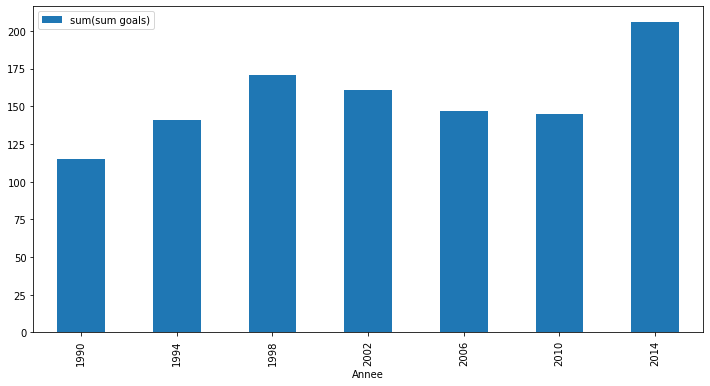

In [146]:
goals_by_year_df= goals_by_year.toPandas()
goals_by_year_df.plot(kind='bar', x = 'Annee', y = 'sum(sum goals)',figsize=(12,6));
